## Import Libraries

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [2]:
# load the dataset
iris = pd.read_csv('iris.csv')

In [3]:
# display the size
print('Size of Iris Dataframe', iris.shape)

Size of Iris Dataframe (150, 5)


## Perform EDA

In [4]:
# display the first few rows
print('First 5 rows of setosa species')
iris.head()

First 5 rows of setosa species


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
print('First 5 rows of versicolor species')
iris[50:55]

First 5 rows of versicolor species


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [6]:
print('First 5 rows of virginica species')
iris[100:105]

First 5 rows of virginica species


,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# summary statistics

iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
classes = np.array(iris['species'])
classes = np.unique(classes)
print(classes)

['setosa' 'versicolor' 'virginica']


In [10]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

#### Observation 

We have four numeric features and just one categorical feature which in turn is the target feature.

The features present in the dataset are:
* Sepal Width  -- numeric
* Sepal Length -- numeric
* Petal Width -- numeric
* Petal Length -- numeric
* Species -- categorical -- 3 classes  

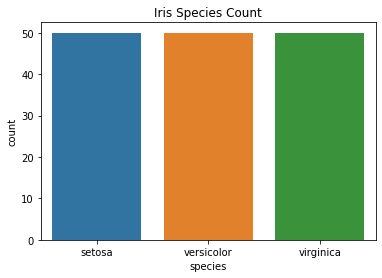

In [11]:
sns.countplot(data=iris, x='species')
plt.title("Iris Species Count")
plt.show()

#### Observation 
The dataset is balanced i.e. equal records are present for all three species.



## Pre-processing

In [12]:
# check for duplicates

print('Original dataset', iris.shape)
duplicateRows = iris[iris.duplicated(keep = 'last')]
print('Duplicates', duplicateRows.shape)
print('Duplicate examples are:')
print(duplicateRows)

Original dataset (150, 5)
Duplicates (3, 5)
Duplicate examples are:
     sepal_length  sepal_width  petal_length  petal_width    species
9             4.9          3.1           1.5          0.1     setosa
34            4.9          3.1           1.5          0.1     setosa
101           5.8          2.7           5.1          1.9  virginica


In [13]:
# remove duplicates

iris = iris.drop_duplicates()
print('Modified dataset', iris.shape)

Modified dataset (147, 5)


## Scatterplot for identifying correlations

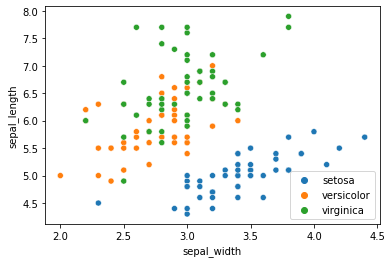

In [14]:
sns.scatterplot(data=iris, x="sepal_width", y="sepal_length", hue='species')
plt.legend(loc='lower right')
plt.show()

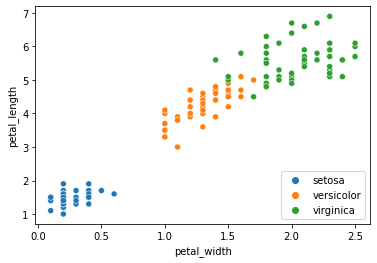

In [15]:
sns.scatterplot(data=iris, x="petal_width", y="petal_length", hue='species')
plt.legend(loc='lower right')
plt.show()

#### Observation
A strong correlation is present between petal width and petal length.


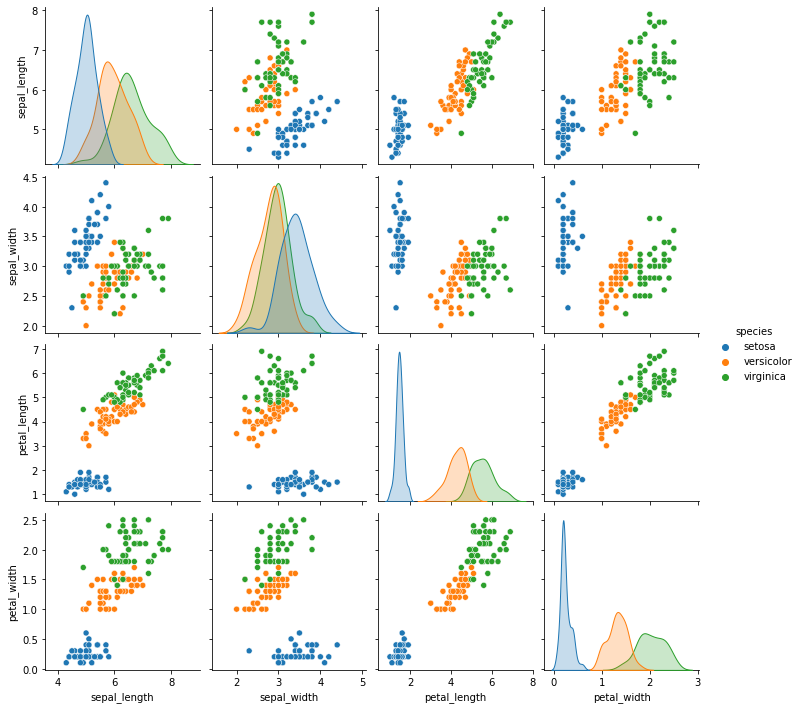

In [16]:
sns.pairplot(data=iris, hue="species")

#### Observation
The setosa species is the most easily distinguishable because of its small feature size.


<AxesSubplot:>

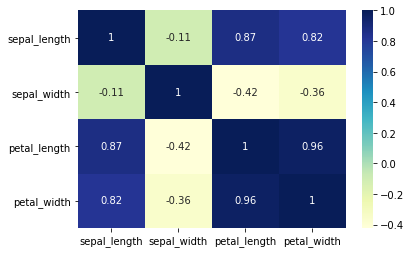

In [17]:
sns.heatmap(iris.corr(), annot = True, cmap = "YlGnBu")

Text(0, 0.5, 'Count')

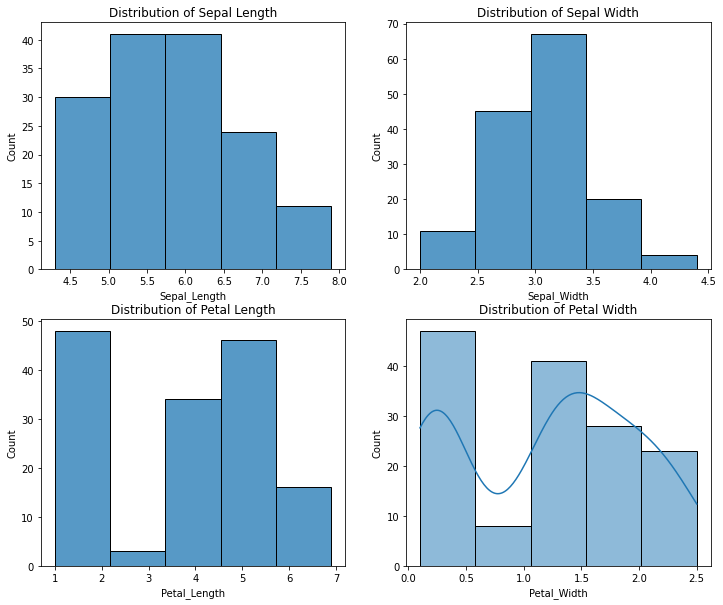

In [18]:
plt.figure(figsize = (12, 10))
plt.subplot(2,2, 1)
sns.histplot(iris["sepal_length"], bins = 5)
plt.title("Distribution of Sepal Length")
plt.xlabel("Sepal_Length")
plt.ylabel("Count")

plt.subplot(2,2, 2)
sns.histplot(iris["sepal_width"], bins = 5)
plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal_Width")
plt.ylabel("Count")

plt.subplot(2,2, 3)
sns.histplot(iris["petal_length"], bins = 5)
plt.title("Distribution of Petal Length")
plt.xlabel("Petal_Length")
plt.ylabel("Count")

plt.subplot(2,2, 4)
sns.histplot(iris["petal_width"], bins = 5, kde=True)
plt.title("Distribution of Petal Width")
plt.xlabel("Petal_Width")
plt.ylabel("Count")

<AxesSubplot:ylabel='Density'>

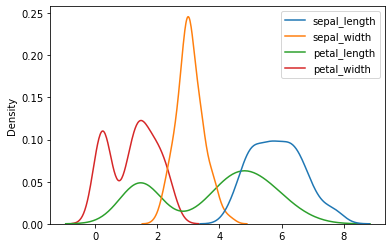

In [19]:
sns.kdeplot(data=iris)

Text(9.924999999999997, 0.5, 'Value')

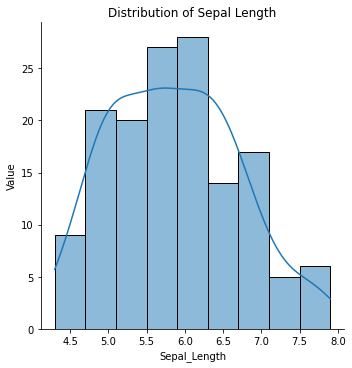

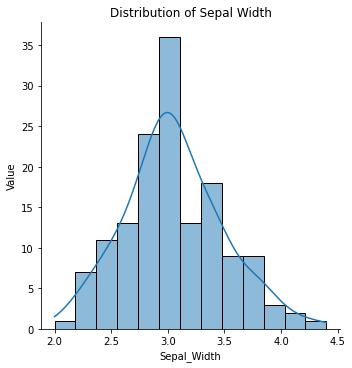

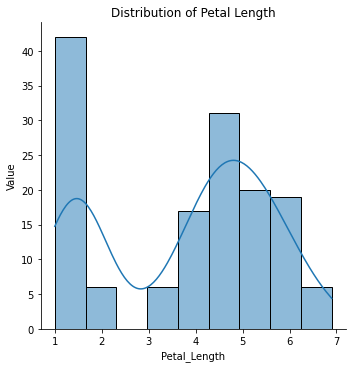

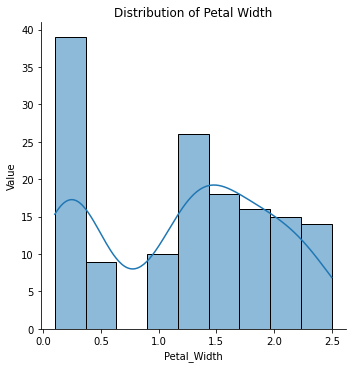

In [20]:
#sns.displot(data=iris, kde=True)

sns.displot(data=iris, x ="sepal_length", kde=True)
plt.title("Distribution of Sepal Length")
plt.xlabel("Sepal_Length")
plt.ylabel("Value")

sns.displot(data=iris, x="sepal_width", kde=True)
plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal_Width")
plt.ylabel("Value")

sns.displot(data=iris, x="petal_length", kde=True)
plt.title("Distribution of Petal Length")
plt.xlabel("Petal_Length")
plt.ylabel("Value")

sns.displot(data=iris, x="petal_width", kde=True)
plt.title("Distribution of Petal Width")
plt.xlabel("Petal_Width")
plt.ylabel("Value")

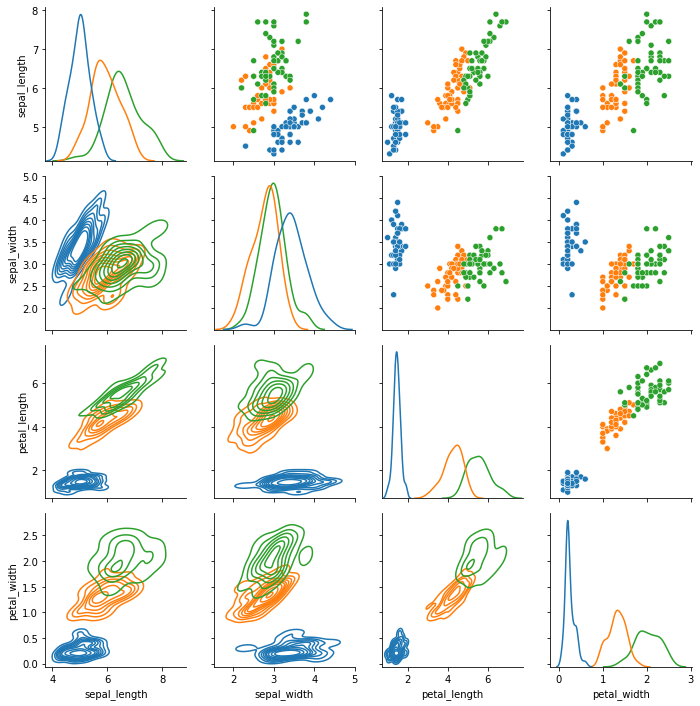

In [21]:
g = sns.PairGrid(iris, diag_sharey=False, hue='species')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

Text(0.5, 1.0, 'Distribution of Petal Width')

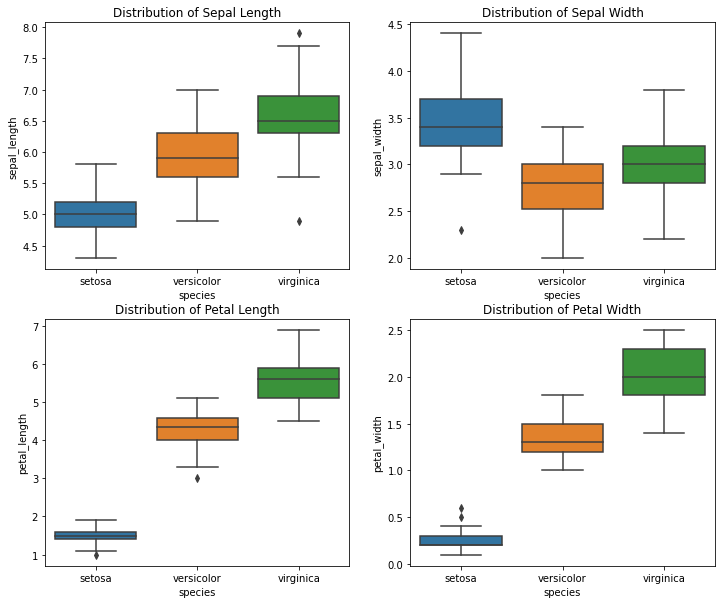

In [22]:
plt.figure(figsize = (12, 10))
plt.subplot(2,2, 1)
sns.boxplot(data=iris, y="sepal_length", x="species")
plt.title("Distribution of Sepal Length")

plt.subplot(2,2, 2)
sns.boxplot(data=iris, y="sepal_width", x="species")
plt.title("Distribution of Sepal Width")

plt.subplot(2,2, 3)
sns.boxplot(data=iris, y="petal_length", x="species")
plt.title("Distribution of Petal Length")

plt.subplot(2,2, 4)
sns.boxplot(data=iris, y="petal_width", x="species")
plt.title("Distribution of Petal Width")

### Conclusion
1. We have four numerical features and just one categorical feature which in turn is the target feature.
2. The dataset is balanced i.e. equal records are present for all three species.
3. A strong correlation is present between petal width and petal length.
4. The setosa species is the most easily distinguishable because of its small feature size.
5. The Versicolor and Virginica species are usually mixed and are sometimes hard to separate, while usually Versicolor has average feature sizes and Virginica has larger feature sizes.

